In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [47]:
data_path = os.getcwd() + "/dataset/raw_labelled/win_S01.csv"
# features = ["A_F", "A_V", "A_L", "L_F", "L_T", "L_L", "T_F", "T_V", "T_L"]

dataset = pd.read_csv(data_path)
time = list(dataset['time'])

TFdata = dataset[["T_F"]].values
TVdata = dataset[["T_V"]].values
TLdata = dataset[["T_L"]].values

dataframe = dataset[["T_F", "T_V", "T_L"]].values
dataset = dataset[["T_F", "T_V", "T_L", "Action"]].values

window_length = int(1*64)
total_windows = int((len(dataset))/window_length)

In [48]:
TFdata = np.array(TFdata)
TVdata = np.array(TVdata)
TLdata = np.array(TLdata)

In [49]:
Tsensor = np.multiply(TFdata, TFdata) + np.multiply(TVdata, TVdata) + np.multiply(TLdata, TLdata)
Tsensor = np.sqrt(Tsensor)

In [50]:
start = 21363
stop = 21683

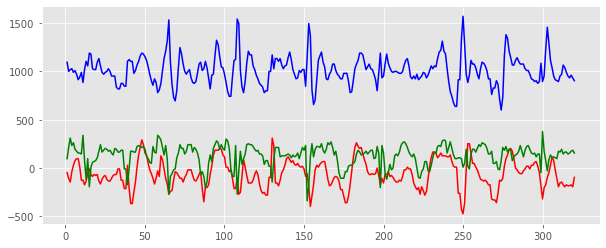

In [51]:
fig, ax = plt.subplots(figsize = (10, 4))
x = range(1, (stop-start+1))
y = TFdata[start:stop]

y1 = TVdata[start:stop]
y2 = TLdata[start:stop]
# y3 = Tsensor[start:stop]
# color = dataset.loc[20403:22003,"Action"]

plt.style.use("ggplot") 

plt.plot(x, y, 'r')
plt.plot(x, y1, 'b')
plt.plot(x, y2, 'g')
# plt.plot(x, y3, 'y')

In [52]:
TFdata = (TFdata-TFdata.mean())/TFdata.std()
TVdata = (TVdata-TVdata.mean())/TVdata.std()
TLdata = (TLdata-TLdata.mean())/TLdata.std()

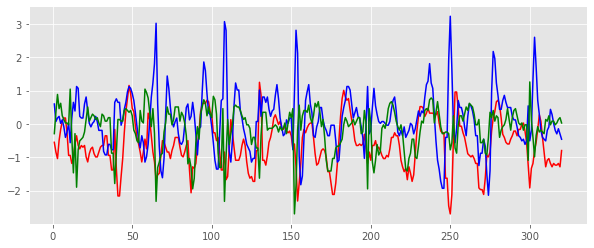

In [53]:
fig, ax = plt.subplots(figsize = (10, 4))
x = range(1, (stop-start+1))
y = TFdata[start:stop]

y1 = TVdata[start:stop]
y2 = TLdata[start:stop]
# color = dataset.loc[20403:22003,"Action"]

plt.style.use("ggplot") 

plt.plot(x, y, 'r')
plt.plot(x, y1, 'b')
plt.plot(x, y2, 'g')

In [54]:
from scipy.signal import butter, lfilter

In [55]:
b, a = butter(1,  0.8 , 'lowpass')

In [56]:
y = lfilter(b, a, TFdata[start:stop])
y1 = lfilter(b, a, TVdata[start:stop])
y2 = TVdata[start:stop]

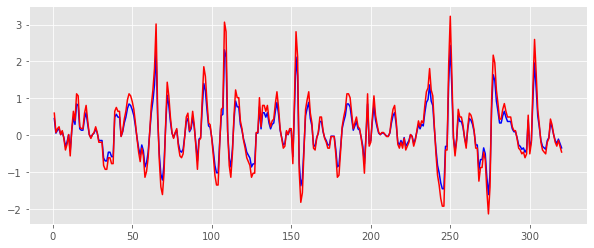

In [57]:
fig, ax = plt.subplots(figsize = (10, 4))

plt.style.use("ggplot") 

# plt.plot(x, y, 'r')
plt.plot(x, y1, 'b')
plt.plot(x, y2, 'r')

In [58]:
import numpy as np

sample_rate = 64  # 64 Hz resolution
signal_lenght = 5*sample_rate  # 10 seconds


In [59]:
dataframe = (dataframe-dataframe.mean())/dataframe.std()
Tsensor = (Tsensor-Tsensor.mean())/Tsensor.std()

In [60]:
# fp_l = 15
# fp_h = 64

# # fs_l = 10
# # fs_h = 512
# T = 0.015625
# fs = int(1/T)

# wp_l = np.tan((2 * np.pi * fp_l * T)/2)
# wp_h = np.tan((2 * np.pi * fp_h * T)/2)
# # ws_l = np.tan((2 * np.pi * fs_l * T)/2)
# # ws_h = np.tan((2 * np.pi * fs_h * T)/2)

# w_o = wp_l * wp_h
# w_bw= wp_h - wp_l

# # h_sl = ws_l / w_bw
# # h_sh = ws_h / w_bw
# h_pl = wp_l / w_bw
# h_ph = wp_h / w_bw

# h_o = h_pl * h_ph

# l_p  = (h_ph**2 - h_o)/h_ph
# # l_sl = (h_sl**2 - h_o)/h_sl
# # l_sh = (h_sh**2 - h_o)/h_sh

# if(abs(l_sh)<abs(l_sl)):
#     l_s = l_sh
# else:
#     l_s = l_sl

# g_p = 3
# g_s = 18

# N = math.log(np.sqrt(10**(g_s/10)-1),10)/math.log(l_s,10)

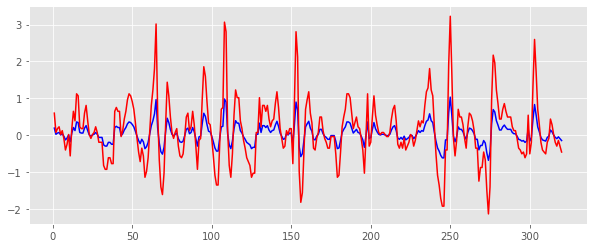

In [61]:
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm

nyq = 0.5 * 64

lowPass = 25/nyq

b1,a1 = signal.butter(5,lowPass,'lowpass')
y = lfilter(b1, a1, TFdata[start:stop])
y1 = lfilter(b1, a1, TVdata[start:stop])
y2 = TVdata[start:stop]

fig, ax = plt.subplots(figsize = (10, 4))

plt.style.use("ggplot") 

# plt.plot(x, y, 'r')
plt.plot(x, y1, 'b')
plt.plot(x, y2, 'r')

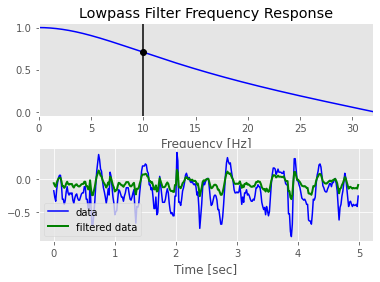

In [62]:
import numpy as np
from scipy.signal import butter, lfilter, freqz, filtfilt
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Setting standard filter requirements.
order = 1
fs = 64.0       
cutoff = 10

b, a = butter_lowpass(cutoff, fs, order)

# Plotting the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Creating the data for filteration
T = 5.0         # value taken in seconds
n = int(T * fs) # indicates total samples
t = np.linspace(0, T, n, endpoint=False)

data = y
# data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)


# Filtering and plotting
y1 = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y1, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
# plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

In [38]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd

WINDOW_SIZE = 64

In [39]:
def round_two_digits(input_num):
    return round(float(input_num), 2)

def get_rolling_avg(input_series, window_size):
    windows = input_series.rolling(window_size)

    # Create a list of moving averages
    moving_averages = windows.mean().values.tolist()
    return moving_averages[window_size - 1:]

def threshold_fn(x, threshold=3, step=2):
    res = pd.Series([0] * len(x), index=x.index)
    t = x.min() + threshold
    res.loc[x.gt(t)] = step
    return res

In [40]:
time = np.arange(0.0, 5.0, 1/64)
acc = y

time = pd.DataFrame(time, columns=["time"])
acc = pd.DataFrame(acc, columns=["acceleration"])

In [41]:
avg_time = get_rolling_avg(time, WINDOW_SIZE)
avg_acc = get_rolling_avg(acc, WINDOW_SIZE)

In [42]:
series_avg_acc = pd.Series(avg_acc)
increasing_elements = series_avg_acc.diff().ge(0)

TypeError: unsupported operand type(s) for -: 'list' and 'list'